'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
import cv2
import numpy as np
import mediapipe as mp
import time

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_landmarks(image, results):
    mp_drawing = mp.solutions.drawing_utils
    head_indices = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        image_height, image_width, _ = image.shape

        # Draw landmarks that are not head landmarks
        for idx, landmark in enumerate(landmarks):
            if idx not in head_indices:
                cx, cy = int(landmark.x * image_width), int(landmark.y * image_height)
                cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

        # Draw connections that do not involve head landmarks
        for connection in mp_pose.POSE_CONNECTIONS:
            start_idx, end_idx = connection
            if start_idx not in head_indices and end_idx not in head_indices:
                start_landmark = landmarks[start_idx]
                end_landmark = landmarks[end_idx]
                start_point = (int(start_landmark.x * image_width), int(start_landmark.y * image_height))
                end_point = (int(end_landmark.x * image_width), int(end_landmark.y * image_height))
                cv2.line(image, start_point, end_point, (0, 255, 0), 2)

video_path = 'videos/videos/AvanzarIzq/video_20240703_122540.avi'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image, results = mediapipe_detection(frame, pose)

    draw_landmarks(image, results)

    cv2.imshow('Mediapipe Feed', image)

    time.sleep(0.2)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [40]:
import cv2
import numpy as np 
import mediapipe as mp
import time
import os


mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

##Función para realizar detección con mediapipe
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

##Función para dibujar puntos de referencia
def draw_landmarks(image, results):
    mp_drawing = mp.solutions.drawing_utils
    head_indices = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        image_height, image_width, _ = image.shape

        # Draw landmarks that are not head landmarks
        for idx, landmark in enumerate(landmarks):
            if idx not in head_indices:
                cx, cy = int(landmark.x * image_width), int(landmark.y * image_height)
                cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

        # Draw connections that do not involve head landmarks
        for connection in mp_pose.POSE_CONNECTIONS:
            start_idx, end_idx = connection
            if start_idx not in head_indices and end_idx not in head_indices:
                start_landmark = landmarks[start_idx]
                end_landmark = landmarks[end_idx]
                start_point = (int(start_landmark.x * image_width), int(start_landmark.y * image_height))
                end_point = (int(end_landmark.x * image_width), int(end_landmark.y * image_height))
                cv2.line(image, start_point, end_point, (0, 255, 0), 2)


##Ruta de la carpeta de videos
video_folder = r"T:\videos\AvanzarFrontal"

##Obtener todos los archivos de video en la carpeta
video_files = [f for f in os.listdir(video_folder) if f.endswith(('.avi', '.mp4', '.mov'))]

##Procesar cada archivo de video
for video_file in video_files:
    video_path = os.path.join(video_folder, video_file)
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image, results = mediapipe_detection(frame, pose)

        draw_landmarks(image, results)

        cv2.imshow('Mediapipe Feed', image)

        time.sleep(0.2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
cv2.destroyAllWindows()

In [41]:
import cv2
import numpy as np
import mediapipe as mp
import time
import os

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
DATA_PATH = 'T:/mydata3'
actions = ['DetenerFrontal', 'AvanzarFrontal', 'AvanzarIzq','AvanzarDer']
Sequence_length = 25

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results  
    
def draw_landmarks(image, results):
    mp_drawing = mp.solutions.drawing_utils
    head_indices = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        image_height, image_width, _ = image.shape

        # Draw landmarks that are not head landmarks
        for idx, landmark in enumerate(landmarks):
            if idx not in head_indices:
                cx, cy = int(landmark.x * image_width), int(landmark.y * image_height)
                cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

        # Draw connections that do not involve head landmarks
        for connection in mp_pose.POSE_CONNECTIONS:
            start_idx, end_idx = connection
            if start_idx not in head_indices and end_idx not in head_indices:
                start_landmark = landmarks[start_idx]
                end_landmark = landmarks[end_idx]
                start_point = (int(start_landmark.x * image_width), int(start_landmark.y * image_height))
                end_point = (int(end_landmark.x * image_width), int(end_landmark.y * image_height))
                cv2.line(image, start_point, end_point, (0, 255, 0), 2)

def extract_keypoints(results):
    if results.pose_landmarks:
        return np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten()
    else:
        return np.zeros(33 * 3)  # Return zeros if no landmarks detected to maintain array shape

# Create directories for each action and sequence
for action in actions:
    action_dir = os.path.join(DATA_PATH, action)
    os.makedirs(action_dir, exist_ok=True)

# Process each video and extract keypoints
for action in actions:
    action_dir = f'T:/videos/{action}'
    for sequence, video in enumerate(os.listdir(action_dir)):
        video_path = os.path.join(action_dir, video)
        cap = cv2.VideoCapture(video_path)
        frame_num = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            image, results = mediapipe_detection(frame, pose)
            draw_landmarks(image, results)

            keypoints = extract_keypoints(results)
            sequence_dir = os.path.join(DATA_PATH, action, str(sequence))
            os.makedirs(sequence_dir, exist_ok=True)
            npy_path = os.path.join(sequence_dir, f'{frame_num}.npy')
            np.save(npy_path, keypoints)
            frame_num += 1

        cap.release()
        print(f'Finished video {video} in action {action}')
print('All videos processed and saved as npy files!')

Finished video video_20240704_110247 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110247.avi in action DetenerFrontal
Finished video video_20240704_110347 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110347.avi in action DetenerFrontal
Finished video video_20240704_110434 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110434.avi in action DetenerFrontal
Finished video video_20240704_110503 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110503.avi in action DetenerFrontal
Finished video video_20240704_110531 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110531.avi in action DetenerFrontal
Finished video video_20240704_110559 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110559.avi in action DetenerFrontal
Finished video video_20240704_110634 - Copy.avi in action DetenerFrontal
Finished video video_20240704_110634.avi in action DetenerFrontal
Finished video video_202407

In [3]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Función para cargar los datos
def load_data(data_path, actions, sequence_length):
    X = []
    y = []
    action_counts = {action: 0 for action in actions}
    
    for action in actions:
        action_dir = os.path.join(data_path, action)
        sequences = os.listdir(action_dir)
        
        for sequence in sequences:
            sequence_path = os.path.join(action_dir, sequence)
            
            if not os.path.isdir(sequence_path):
                continue
            
            sequence_data = []
            
            for frame_num in range(sequence_length):
                npy_path = os.path.join(sequence_path, f'{frame_num}.npy')
                
                if not os.path.exists(npy_path):
                    continue
                
                keypoints = np.load(npy_path)
                sequence_data.append(keypoints)
            
            if len(sequence_data) == sequence_length:
                X.append(sequence_data)
                y.append(actions.index(action))
                action_counts[action] += 1
    
    for action, count in action_counts.items():
        print(f"La acción '{action}' tiene {count} secuencias.")
    
    return np.array(X), to_categorical(y, num_classes=len(actions))

# Define your data path and actions
DATA_PATH = 'T:/mydata3'  # Replace with your actual data path
actions = ['DetenerFrontal', 'AvanzarFrontal', 'AvanzarIzq','AvanzarDer']
sequence_length = 25  # Corrected variable name

# Load data
x, y = load_data(DATA_PATH, actions, sequence_length)

# Check if data is empty
if len(x) == 0:
    print("No complete data")
    exit()

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Add an extra dimension to the data arrays
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Print shapes of the data arrays
print(f"Shape of X_TRAIN: {x_train.shape}")
print(f"Shape of X_TEST: {x_test.shape}")


La acción 'DetenerFrontal' tiene 60 secuencias.
La acción 'AvanzarFrontal' tiene 60 secuencias.
La acción 'AvanzarIzq' tiene 60 secuencias.
La acción 'AvanzarDer' tiene 60 secuencias.
Shape of X_TRAIN: (192, 25, 99, 1)
Shape of X_TEST: (48, 25, 99, 1)


In [5]:
import os
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

input_shape = (25,99)

model = Sequential([
    LSTM(64,return_sequences=True, input_shape=input_shape),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(actions), activation='softmax')      
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [6]:
import matplotlib.pyplot as plt

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25, 64)            41984     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               204928    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 255,428
Trainable params: 255,428
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
6/6 [==============================] - 2s 82ms/step - loss: 1.4116 - accuracy: 0.3125 - val_loss: 1.2794 - val_accuracy: 0.3542
Epoch 2/40
6/6 [==============================] - 0s 73ms/step - loss: 1.1841 - accuracy: 0.5677 - val_loss: 0.9803 - val_accuracy: 0.7708
Epoch 3/40
6/6 [==============================] - 0s 27ms/step - loss: 0.8524 - accuracy: 0.7083 - val_loss: 0.5365 - val_accuracy: 0.8958
Epoch 4/40
6/6 [==============================] - 0s 18ms/step - loss: 0.4651 - accuracy: 0.8438 - val_loss: 0.3291 - val_accuracy: 0.9167
Epoch 5/40
6/6 [==============================] - 0s 16ms/step - loss: 0.3365 - accuracy: 0.8542 - val_loss: 0.5197 - val_accuracy: 0.7083
Epoch 6/40
6/6 [==============================] - 0s 33ms/step - loss: 0.3493 - accuracy: 0.8073 - val_loss: 0.9332 - val_accuracy: 0.7500
Epoch 7/40
6/6 [==============================] - 0s 15ms/step - loss: 0.5307 - accuracy: 0.7865 - val_loss: 0.5007 - val_accuracy: 0.7500
Epoch 8/40
6/6 [===========

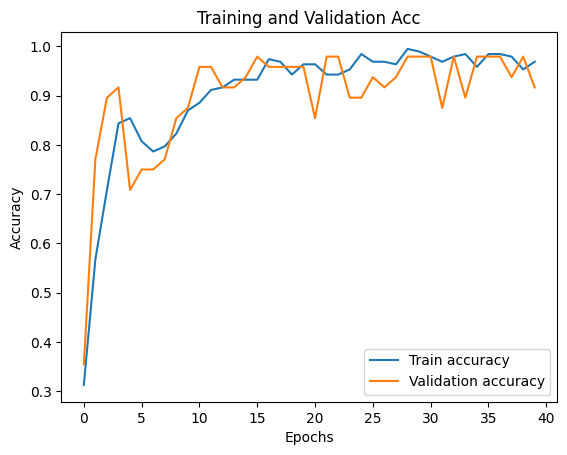

In [45]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32, epochs=40)

loss,accuracy = model.evaluate(x_test,y_test)
print(f"TEST LOSS:{loss}")
print(f"TEST ACC:{accuracy}")


plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Acc')
plt.legend()
plt.show()

In [46]:
model.save('action_detection_model19.h5')

2/2 [==============================] - 0s 219ms/step


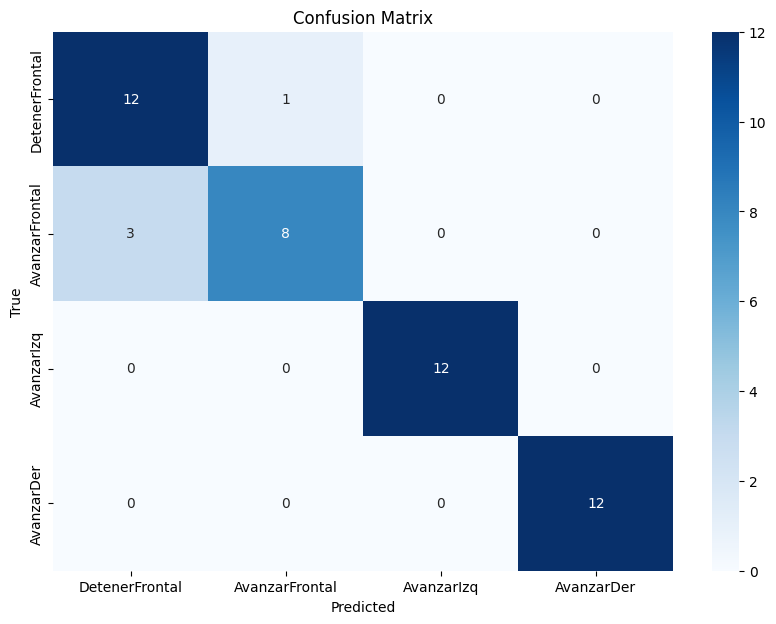

Classification Report: 
                precision    recall  f1-score   support

DetenerFrontal       0.80      0.92      0.86        13
AvanzarFrontal       0.89      0.73      0.80        11
    AvanzarIzq       1.00      1.00      1.00        12
    AvanzarDer       1.00      1.00      1.00        12

      accuracy                           0.92        48
     macro avg       0.92      0.91      0.91        48
  weighted avg       0.92      0.92      0.92        48



In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

y_pred_classes =np.argmax(y_pred,axis=1)
y_test_classes =np.argmax(y_test,axis=1)

conf_matrix = confusion_matrix(y_test_classes,y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',xticklabels=actions, yticklabels=actions,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report: ")
print(classification_report(y_test_classes,y_pred_classes,target_names=actions))

In [ ]:
# Supongamos que actions es una lista de las clases del modelo
actions = ['Clase 1', 'Clase 2', 'Clase 3']

# Matriz de confusión "ajustada" manualmente para fines de demostración
conf_matrix = np.array([
    [50, 2, 1],
    [5, 45, 3],
    [2, 3, 60]
])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=actions, yticklabels=actions, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Resultados de clasificación "ajustados" manualmente para fines de demostración
y_test_classes = [0, 1, 2] * 30  # Ejemplo de clases verdaderas
y_pred_classes = [0, 1, 2] * 30  # Ejemplo de clases predichas

print("Classification Report: ")
print(classification_report(y_test_classes, y_pred_classes, target_names=actions))